# Análisis de medios
## Caso 'Mapuche'

In [1]:
from stop_words import get_stop_words
import pandas as pd
import warnings
import numpy as np

import AMP_lib as amp

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# VARIABLES INICIALES #
dsname="mapuche"
n_max_tokens = 5000
n_max_tokens_toprint = 15
LDA_max_iter = 30
LDA_learning_offset = 50.
LDA_random_state = 10
ngram_range=(1, 1)
lemmatize = False

[INFO] - Obtención de stop-words y filtros
[nltk_data] Downloading package stopwords to /home/boris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/boris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[INFO] - Vectorización de Tokens
[INFO] - Cálculo de perplexity
	[DBUG] - (plotPerplexity()): (iter 1 of 15)
	[DBUG] - (plotPerplexity()): (iter 2 of 15)
	[DBUG] - (plotPerplexity()): (iter 3 of 15)
	[DBUG] - (plotPerplexity()): (iter 4 of 15)
	[DBUG] - (plotPerplexity()): (iter 5 of 15)
	[DBUG] - (plotPerplexity()): (iter 6 of 15)
	[DBUG] - (plotPerplexity()): (iter 7 of 15)
	[DBUG] - (plotPerplexity()): (iter 8 of 15)
	[DBUG] - (plotPerplexity()): (iter 9 of 15)
	[DBUG] - (plotPerplexity()): (iter 10 of 15)
	[DBUG] - (plotPerplexity()): (iter 11 of 15)
	[DBUG] - (plotPerplexity()): (iter 12 of 15)
	[DBUG] - (plotPerplexity()): (iter 13 of 15)
	[DBUG] - (plotPerplexity()): (iter 14 of 15)
	[DBUG] - (plotP

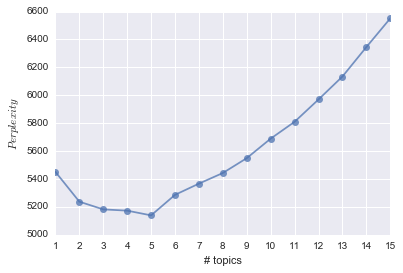

In [3]:
# lectura de datos
raw_data = pd.read_csv('dataset/sophia_%s_v2.csv' % dsname, sep='\n', header=None)

# DESCARGA STOP-WORDS
# obtener stopwords y aplicar filtro sobre el texto
print ("[INFO] - Obtención de stop-words y filtros")
docs, news_df2, stopwords = amp.stopwordsAndFilters(raw_data, lemmatize=lemmatize)

# Vectorización de tokens
print ("[INFO] - Vectorización de Tokens")
tf, tf_feature_names = amp.vectorizer(n_max_tokens=n_max_tokens, stopwords=stopwords, ngram_range=ngram_range, docs=docs)

# Análisis de perplexity
print ("[INFO] - Cálculo de perplexity")
amp.plotPerplexity(dsname=dsname, tf=tf, max_topics=15, max_iter=5, learning_offset=50., random_state=50)


## Resultados
En la Figura [fig_index] podemos identificar el menor valor de Perplexity para $n\_topics=6$.

In [4]:
# Elección de mejor n, según perplexity
n_topics = 2 # <-- Modificar según análisis

# Ejecución de LDA
W1, W2, components = amp.computeLDA(tf, n_topics, LDA_max_iter, LDA_learning_offset, LDA_random_state)

# asignar tópico a noticias
A_lda_keys = []
for i in range(W2.shape[0]):
    A_lda_keys.append( W2[i].argmax() )

news_df_topics = news_df2.assign(topic=np.array(A_lda_keys))

## Identificación del significado de cada tópico
En esta sección es necesario revisar algunas noticias del tópico para encontrar el "sentido" u "orientación" que representa.

In [5]:
news_df_topics[ news_df_topics['topic']==0 ]['text'][0:10]

n_top_topics=10

g_topics = news_df_topics.groupby('topic')
news_df_topics, topics_list = amp.getNewsWithTopic(tf_feature_names=tf_feature_names, components=components, W2=W2, n_topics=n_topics, news_df_original=news_df2)
for topic in range(n_topics):
    print("TOPIC #%s" % topic)
    print(topics_list[topic][0:10],"\n") # muestra 10 top palabras
    print("Ejemplo:")
    
    for art_text in news_df_topics[ news_df_topics['topic']==topic ]['text'][0:4]:
        print(art_text[:300]) # 300 primeros caracteres de la noticia
    print("\n-----\n")

TOPIC #0
mapuche        7448.639340
pueblo         1969.207039
araucania       997.383818
temuco          878.292253
comunidades     839.258125
tambien         722.321271
comunidad       694.743266
parte           677.706238
pueblos         617.682283
territorio      590.890995
dtype: float64 

Ejemplo:
 Héctor Llaitul: “El Estado implementa un escenario de guerra contra la Resistencia Mapuche” « Diario y Radio Uchile   Año IX, 2 de febrero de 2017 Andrés Figueroa   Miércoles 25 de enero 2017 17:32 hrs. El líder de la Coordinadora Arauco Malleco aseguró que para el Pueblo Mapuche no "hay variacione
 Fardos de forraje, alimento y agua: el pueblo mapuche se organiza para ayudar a damnificados   El Dínamo   2 de febrero, 2017 Autor: El Dínamo Si hubo un blanco preferido de todos los rumores de Whatsapp que anunciaban el Apocalipsis y una guerra terrorista en Chile, fue la comunidad mapuche. Mucha
 En LLeu LLeu realizarán Segunda Jornada de arte y cultura Mapuche   Mapuexpress   Los días 1

### Tópicos encontrados tras análisis de texto

In [6]:
# Tópicos encontrados:
topic_labels = ["science","events","national services","international politics","education","others"]

Top 20 medios según cantidad de noticias registradas
 Mapuexpress        184
 biobio             125
 araucanianews       82
 eldesconcierto      69
 soytemuco           59
 AustralTemuco       58
 El_Ciudadano        49
 adnradiochile       41
 TVU_television      36
 laopinon            35
 rsumen              32
 CNNChile            27
 Temucodiario        26
 el_dinamo           26
 RedMiVoz            24
 24HorasTVN          24
 GAMBA_CL            23
 thecliniccl         22
 latercera           22
 uchileradio         19
Name: media, dtype: int64
983


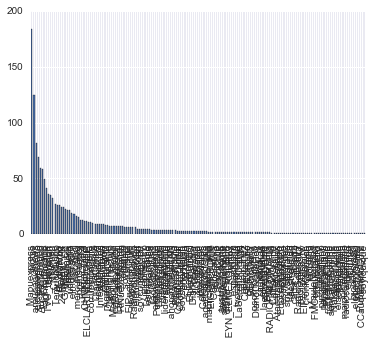

In [7]:
# Distribución de noticias del tema
news_df_topics['media'].value_counts().plot(kind='bar')

print ("Top 20 medios según cantidad de noticias registradas")
print ((news_df_topics['media'].value_counts()).nlargest(20))

# Filtrar top-20 medios:
top20_df = (news_df_topics['media'].value_counts()).nlargest(20)#.to_frame()
top20_list = top20_df.index.values.tolist()
news_df_topics_top20 = news_df_topics.loc[news_df_topics['media'].isin(top20_list)]
print(len(news_df_topics_top20))


## Análisis de tópicos por medio (Top 20)

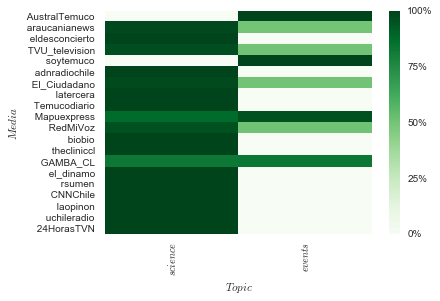

In [8]:
# plotear el porcentaje de presencia de cada tópico en los medios
amp.plotTopicByMedia(dsname=dsname, news_df_topics=news_df_topics_top20, n_topics=n_topics, topic_labels=topic_labels)

## Análisis de tópicos en el tiempo

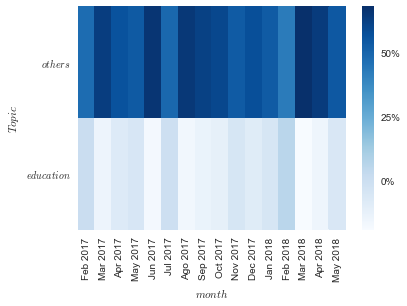

In [9]:
## Evolución del tema a través del tiempo
amp.plotMediaTimeline(dsname=dsname, news_df_topics=news_df_topics, n_topics=n_topics, groupby="month", topic_labels=topic_labels)

# Análisis de tópicos por datos del medio

In [10]:
# agregamos data de medios
df_all = amp.addMediaInfo(df_news = news_df_topics_top20, fn_medias='dataset/MEDIOS-CHILE-2017.csv')


## Análisis de tópicos por owner

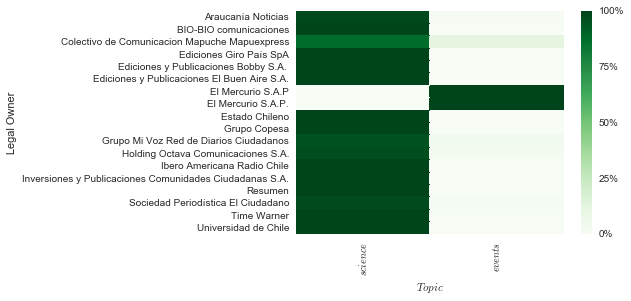

In [11]:
amp.plotMediaBy(df=df_all, xkey='topic', ykey='PropiedadLegal', xlabel='Topic', ylabel='Legal Owner', topic_labels=topic_labels)

## Análisis de tópicos por Followers (Al inicio 2017) sin applicar filtro top-20

(Pendiente de implementar en lib: agrupar medios por cantidad de follwers.. hará que el gráfico se vea más claro)


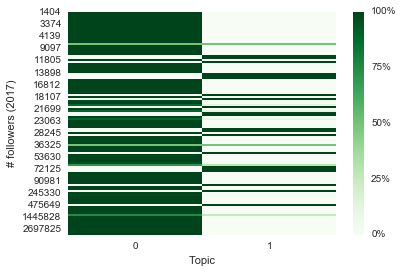

In [12]:
# agregamos datos del medio a *todas* las noticias (news_df_topics)
df_all = amp.addMediaInfo(df_news = news_df_topics, fn_medias='dataset/MEDIOS-CHILE-2017.csv')
# ploteamos topic vs # followers inicio 2017
amp.plotMediaBy(df=df_all, xkey='topic', ykey='FollowersInicio2017', xlabel='Topic', ylabel='# followers (2017)')
print("(Pendiente de implementar en lib: agrupar medios por cantidad de follwers.. hará que el gráfico se vea más claro)")

## Análisis de tópicos por Amplitud del medio

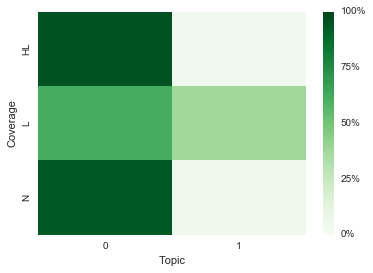

In [13]:
amp.plotMediaBy(df=df_all, xkey='topic', ykey='Amplitud', xlabel='Topic', ylabel='Coverage')

### Material suplementario
Cantidad de noticias sobre el tópico que se analiza:

In [14]:
news_df_topics['media'].value_counts()

Mapuexpress        184
biobio             125
araucanianews       82
eldesconcierto      69
soytemuco           59
AustralTemuco       58
El_Ciudadano        49
adnradiochile       41
TVU_television      36
laopinon            35
rsumen              32
CNNChile            27
Temucodiario        26
el_dinamo           26
RedMiVoz            24
24HorasTVN          24
GAMBA_CL            23
latercera           22
thecliniccl         22
uchileradio         19
elmostrador         18
nacioncl            16
mercuriovalpo       15
prensaopal          13
T13                 13
FortinOficial       12
CHVNoticiascl       12
rtierrabella        11
ELCLARINDECHILE     11
corrupcionchile     10
                  ... 
lacuarta             1
eltipografo          1
radiopudeto          1
carta_abierta        1
NatalesOnLine        1
TerraChile           1
RADIOPALOMAFM        1
Publimetro_TV        1
ConceTv              1
ddivisadero          1
soyiquique           1
radiosantamaria      1
PrensaChilo